**PCOS PREDICTION USING MACHINE LEARNING MODEL**

**INTRODUCTION**

Polycystic Ovary Syndrome (PCOS) is a common hormonal disorder affecting women of reproductive age, leading to irregular menstrual cycles, infertility, and metabolic complications. This project aims to analyze a PCOS dataset using machine learning techniques to identify key factors associated with the condition and build predictive models for early diagnosis.

In these project, the dataset contains medical and lifestyle-related attributes collected from women, including Demographic Details such as Age, BMI, and ethnicity, Menstrual and Hormonal Features such as Menstrual regularity, hirsutism, and acne severity, Metabolic Indicators such as Insulin resistance, stress levels, and PCOS family history, Diagnosis Label such as Indicates whether a person has PCOS (Yes/No). Among these the target variable is Diagnosis,which indicates whether the patient has been diagnosed with PCOS or not.

Using machine learning techniques such as Logistic Regression, Randon Forest, Decision Tree, KNN, and SVM, the study aims to classify patients based on medical and lifestyle attributes. Data preprocessing, exploratory analysis, and model evaluation help derive insights that can assist healthcare professionals in early detection and intervention for PCOS.

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [113]:
df=pd.read_csv("C:\\Users\\smartech\\OneDrive\\Desktop\\pcos_prediction_dataset.csv")

In [114]:
df

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,Guinea,28,Normal,Regular,No,Moderate,Yes,No,3,Low,Urban,Middle,Yes,Yes,0.090663,African,No
119996,Mozambique,35,Overweight,Regular,No,NaN,No,No,5,Low,Rural,High,Yes,Yes,0.167482,Asian,No
119997,Cambodia,16,Normal,Regular,No,Moderate,No,No,9,Medium,Rural,Low,Yes,Yes,0.236241,African,Yes
119998,Benin,15,Obese,Regular,Yes,NaN,Yes,Yes,1,Medium,Rural,High,No,No,0.119993,Hispanic,No


In [115]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [116]:
print(df.describe())

                 Age  Lifestyle Score  Undiagnosed PCOS Likelihood
count  120000.000000    120000.000000                120000.000000
mean       31.980508         5.506567                     0.149937
std        10.096799         2.871052                     0.057786
min        15.000000         1.000000                     0.050001
25%        23.000000         3.000000                     0.099820
50%        32.000000         6.000000                     0.149844
75%        41.000000         8.000000                     0.200061
max        49.000000        10.000000                     0.249998


In [117]:
df = df.dropna()

In [118]:
print(df.isnull().sum())

Country                        0
Age                            0
BMI                            0
Menstrual Regularity           0
Hirsutism                      0
Acne Severity                  0
Family History of PCOS         0
Insulin Resistance             0
Lifestyle Score                0
Stress Levels                  0
Urban/Rural                    0
Socioeconomic Status           0
Awareness of PCOS              0
Fertility Concerns             0
Undiagnosed PCOS Likelihood    0
Ethnicity                      0
Diagnosis                      0
dtype: int64


In [119]:
print(df.duplicated().sum())

0


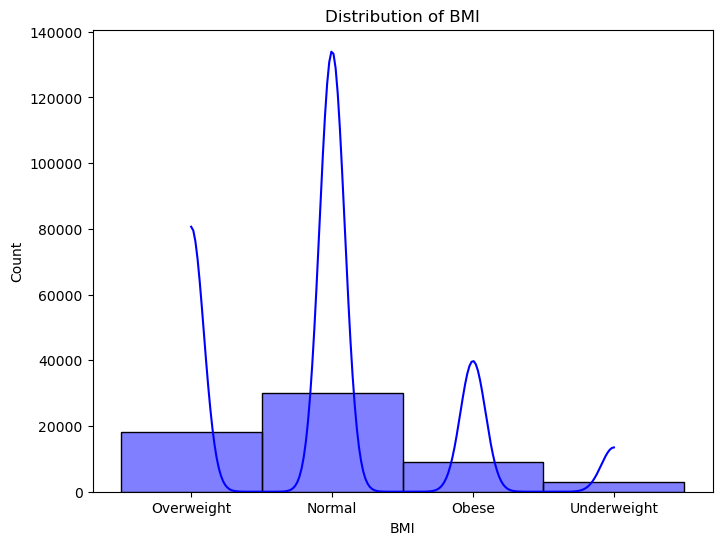

In [120]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, color='blue')
plt.title('Distribution of BMI')
plt.show()

**This histogram indicates that the largest portion of the dataset falls into the Normal BMI range, with progressively fewer individuals in the Overweight and Obese categories, and an even smaller proportion classified as Underweight. The prominent peak around Normal BMI suggests that most participants maintain a healthy weight, while those at the extremes (Underweight or Obese) represent a smaller subset of the population.**

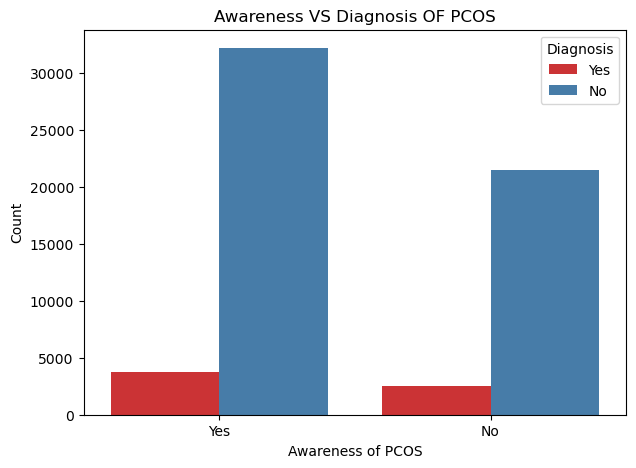

In [122]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Awareness of PCOS', hue='Diagnosis', palette='Set1')
plt.title('Awareness VS Diagnosis OF PCOS')
plt.xlabel('Awareness of PCOS')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

**While many individuals are aware of PCOS, the diagnosis rate remains significantly lower in both aware and unaware groups. This indicates that despite awareness, diagnosis rates are still relatively low, emphasizing the need for better screening, education, and medical consultation. It highlights the importance of encouraging medical check-ups and early detection for effective management of PCOS.**

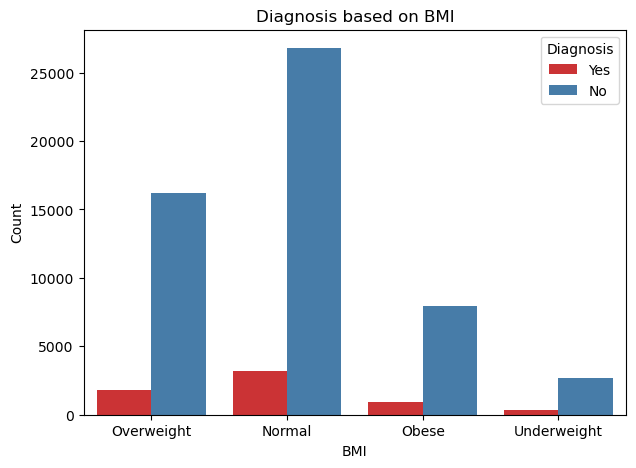

In [124]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='BMI', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis based on BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

**The chart shows the relationship between BMI categories and PCOS diagnosis. Most individuals fall under the "Normal" BMI category, but diagnosis rates are higher among overweight and obese individuals. This suggests a possible link between higher BMI and PCOS risk, emphasizing the need for weight management in PCOS prevention and treatment.**

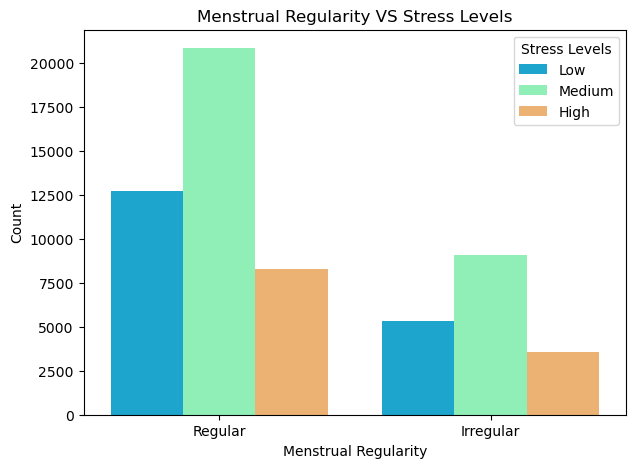

In [126]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Menstrual Regularity', hue='Stress Levels', palette='rainbow')
plt.title('Menstrual Regularity VS Stress Levels')
plt.xlabel('Menstrual Regularity')
plt.ylabel('Count')
plt.legend(title='Stress Levels', loc='upper right')
plt.show()

**This bar chart shows how menstrual regularity (Regular vs. Irregular) distributes across different stress levels (Low, Medium, High) The highest counts of regular cycles are associated with low to medium stress, whereas irregular cycles appear more common at higher stress levels. This suggests that increased stress may contribute to irregular menstrual pattern.**

In [128]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [129]:
numerical_columns

Index(['Age', 'Lifestyle Score', 'Undiagnosed PCOS Likelihood'], dtype='object')

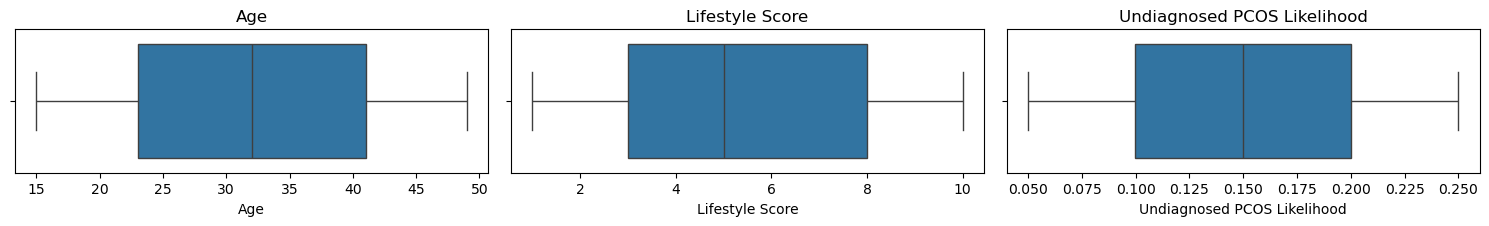

In [130]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**The medians and ranges suggest that while most participants cluster around certain midpoints for age and lifestyle scores, there are outliers in each. Undiagnosed PCOS Likelihood varies across individuals, indicating some people may be at higher risk despite not having a formal diagnosis.**

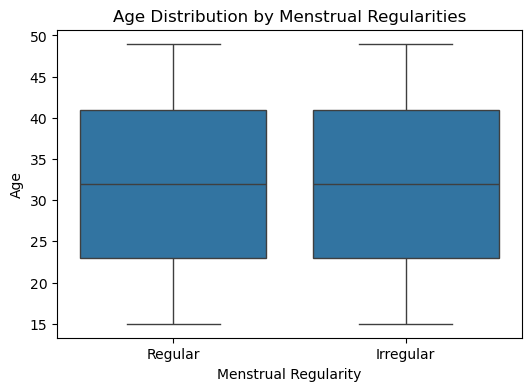

In [132]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Menstrual Regularity', y='Age', data=df)
plt.title('Age Distribution by Menstrual Regularities')
plt.show()

**Both Regular and Irregular groups span a similar age range, suggesting that irregularity can occur at various ages. If there is a slight difference in medians it may hint that one group tends to be marginally older or younger, but the overlap indicates age alone may not fully explain menstrual irregularity.**

In [134]:
binary_cols = ['Diagnosis', 'Family History of PCOS', 'Hirsutism']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

C:\Users\smartech\AppData\Local\Temp\ipykernel_11844\1308656105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


In [135]:
df_encoded = pd.get_dummies(df, columns=['BMI', 'Menstrual Regularity', 'Acne Severity','Insulin Resistance','Stress Levels','Urban/Rural','Socioeconomic Status','Awareness of PCOS','Fertility Concerns','Ethnicity'], drop_first=True)

In [136]:
df.drop(columns=['Country'],inplace=True,axis=1)

C:\Users\smartech\AppData\Local\Temp\ipykernel_11844\3494381393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Country'],inplace=True,axis=1)


In [137]:
for col in df.columns:
    if df[col].dtype == 'object':  
        print(f"Column '{col}' has non-numeric values.")

Column 'BMI' has non-numeric values.
Column 'Menstrual Regularity' has non-numeric values.
Column 'Acne Severity' has non-numeric values.
Column 'Insulin Resistance' has non-numeric values.
Column 'Stress Levels' has non-numeric values.
Column 'Urban/Rural' has non-numeric values.
Column 'Socioeconomic Status' has non-numeric values.
Column 'Awareness of PCOS' has non-numeric values.
Column 'Fertility Concerns' has non-numeric values.
Column 'Ethnicity' has non-numeric values.


In [138]:
numeric_df=df.select_dtypes(include=["int64","float64"])

In [139]:
cor=numeric_df.corr()
cor

,Age,Hirsutism,Family History of PCOS,Lifestyle Score,Undiagnosed PCOS Likelihood,Diagnosis
Age,1.000000,0.006628,-0.001776,0.002186,0.004444,0.002175
Hirsutism,0.006628,1.000000,-0.002047,-0.002176,0.009313,0.000915
Family History of PCOS,-0.001776,-0.002047,1.000000,-0.000895,0.001061,-0.004565
Lifestyle Score,0.002186,-0.002176,-0.000895,1.000000,0.001690,0.007706
Undiagnosed PCOS Likelihood,0.004444,0.009313,0.001061,0.001690,1.000000,0.003974
Diagnosis,0.002175,0.000915,-0.004565,0.007706,0.003974,1.000000


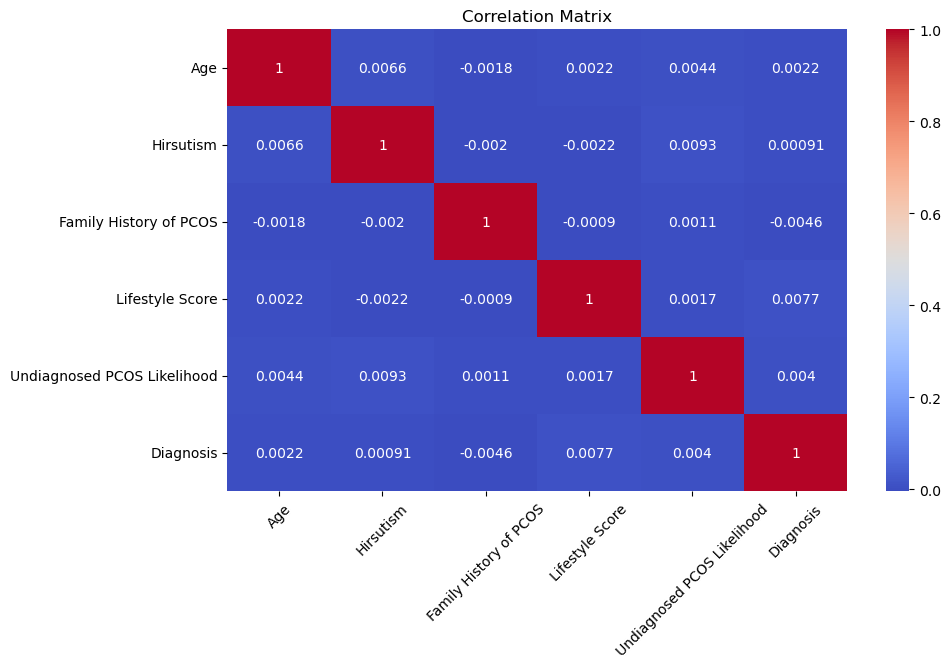

In [140]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

**The heatmap visually represents the strength of these correlations, with color intensity indicating stronger or weaker relationships.These matrix shows that none of the variables (Age, Hirsutism, Family History of PCOS, Lifestyle Score, Undiagnosed PCOS Likelihood, and Diagnosis) exhibit a strong linear relationship with one another, as indicated by the very low correlation coefficients. This suggests that any associations among these variables may be weak or non-linear in nature.The largest correlation in the matrix (Hirsuitism and Undiagnosed PCOS Likelihood) is still extremely small in practical terms, suggesting minimal linear association.**


In [142]:
df.to_csv("cleaned_pcos_dataset.csv", index=False)

In [143]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [144]:
df = pd.read_csv("cleaned_pcos_dataset.csv")  

In [145]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [146]:
df.fillna(df.median(), inplace=True)

In [147]:
X = df.drop(columns=['Diagnosis']) 
y = df['Diagnosis']

In [148]:
#Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

In [149]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [150]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [151]:
#Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [152]:
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({0: 42890, 1: 42890})


In [153]:
#Initialize logistic regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

In [154]:
print("Accuracy of Logistic Regression Performance:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression Performance: 0.5107235249937412
              precision    recall  f1-score   support

           0       0.90      0.51      0.65     10738
           1       0.10      0.49      0.17      1245

    accuracy                           0.51     11983
   macro avg       0.50      0.50      0.41     11983
weighted avg       0.81      0.51      0.60     11983

Confusion Matrix:
 [[5509 5229]
 [ 634  611]]


**RANDOM FOREST CLASSIFIER**

In [156]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [157]:
print("Accuracy of Random Forest Model:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest Model: 0.828590503212885
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     10738
           1       0.11      0.09      0.10      1245

    accuracy                           0.83     11983
   macro avg       0.50      0.50      0.50     11983
weighted avg       0.82      0.83      0.82     11983



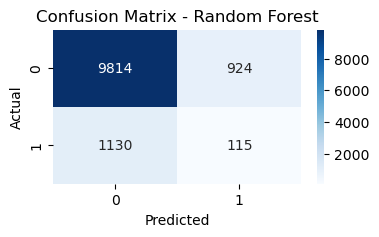

In [158]:
#Confusion Matrix for Random Forest
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [159]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(X_test)

In [160]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7581573896353166
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     10738
           1       0.12      0.20      0.15      1245

    accuracy                           0.76     11983
   macro avg       0.51      0.51      0.50     11983
weighted avg       0.82      0.76      0.79     11983

Confusion Matrix:
 [[8833 1905]
 [ 993  252]]


In [161]:
#KNN model (Choosing k=5 as default)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)
y_pred_knn = knn_model.predict(X_test)

In [162]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.6556788784110824
              precision    recall  f1-score   support

           0       0.90      0.70      0.78     10738
           1       0.11      0.31      0.16      1245

    accuracy                           0.66     11983
   macro avg       0.50      0.51      0.47     11983
weighted avg       0.82      0.66      0.72     11983

Confusion Matrix:
 [[7465 3273]
 [ 853  392]]


In [163]:
#SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)
y_pred_svm = svm_model.predict(X_test)

In [220]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.5076358174079947
              precision    recall  f1-score   support

           0       0.90      0.51      0.65     10738
           1       0.10      0.49      0.17      1245

    accuracy                           0.51     11983
   macro avg       0.50      0.50      0.41     11983
weighted avg       0.81      0.51      0.60     11983

Confusion Matrix:
 [[5468 5270]
 [ 630  615]]


In [223]:
models=['Logistic Regression','Random Forest','Decision Tree','KNN','Support Vector']
accuracies=[accuracy_score(y_test, y_pred),accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_svm)]

In [225]:
df_results=pd.DataFrame({'Model':models,'Accuracy':accuracies})
df_results

,Model,Accuracy
0,Logistic Regression,0.510724
1,Random Forest,0.828591
2,Decision Tree,0.758157
3,KNN,0.655679
4,Support Vector,0.507636


**the Random Forest model achieved the highest accuracy of 82.85%, making it the most reliable choice and best model for predicting PCOS in this dataset.** 

**CONCLUSION**

This project aimed to predict Polycystic Ovary Syndrome (PCOS) using machine learning models based on various health parameters. Through data analysis and model evaluation, several key insights were obtained:

**1.PCOS Awareness vs. Diagnosis:** While many individuals are aware of PCOS, there is still a gap between awareness and actual diagnosis. This highlights the need for better education and early screening.

**2.Impact of BMI on PCOS:** The analysis showed a significant correlation between BMI categories and PCOS diagnosis. Individuals with obesity or overweight conditions had a higher prevalence, emphasizing the role of weight management in PCOS risk.

**3.Model Performance Comparison:** Various machine learning models were tested, and Random Forest emerged as the best-performing model with an accuracy of 82.8%, followed by Decision Tree (75.8%) and KNN (65.5%). Logistic Regression and Support Vector Machines had lower accuracy, indicating their limitations in capturing complex patterns in the dataset.

**4.Importance of Machine Learning in Healthcare:** The study demonstrated how machine learning can assist in early detection and risk assessment of PCOS. These predictive models can help healthcare professionals in decision-making and proactive intervention.

**5.Handling Class Imbalance:** Since medical datasets often have an imbalance (fewer PCOS cases than non-PCOS), SMOTE (Synthetic Minority Over-sampling Technique) was applied to improve model performance, ensuring that minority class instances were well-represented.


This project provided valuable insights into PCOS prediction using machine learning. The findings suggest that BMI, awareness, and early screening play a crucial role in managing PCOS risks. Based on the accuracy comparison of different models, the Random Forest model achieved the highest accuracy of 82.85%, making it the most suitable model for PCOS classification . The Decision Tree model also performed well with 75.81% accuracy, while KNN, Logistic Regression, and Support Vector Machine (SVM) showed comparatively lower accuracies. This suggests that ensemble methods like Random Forest are better suited for this classification task, likely due to their ability to handle complex patterns and reduce overfitting.